# Credit Risk Evaluator

In [3]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
df = pd.read_csv("Resources/lending_data.csv")
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*My prediction is that the RandomForest Model will produce slightly better predicitons*

## Split the Data into Training and Testing Sets

In [6]:
# Split the data into X_train, X_test, y_train, y_test
X = df.drop("loan_status", axis=1).values
y = df.loc[:, ["loan_status"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.75 : 0.25


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [7]:
#Big ol machine

def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[55978   299]
 [  200  1675]]

                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.89      0.87      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.94      0.93     58152
weighted avg       0.99      0.99      0.99     58152

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[18681    78]
 [   56   569]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.91      0.89       625

    accuracy                           0.99     19384
   macro avg       0.94      0.95      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    

AUC for the Model Test Set: 0.9969096007249854


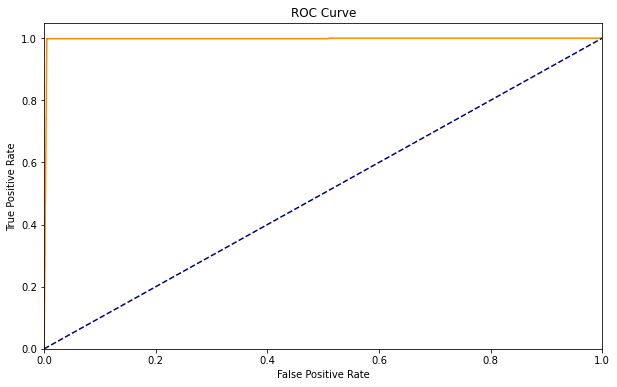

Brier Score:
108.18437115219346


In [8]:
# Train a Logistic Regression model and print the model score
#The 1.0 F1 in the Training set is suspicious for over-fitting
#LR Model has a great AUC score and the ROC Curve is very nice
#Brier score is a 108, very good.
#The confusion matrics seems suspicious a bit as well.
lr = LogisticRegression(max_iter=10000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[56153   124]
 [   42  1833]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.94      0.98      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[18687    72]
 [   68   557]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.89      0.89      0.89       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    

AUC for the Model Test Set: 0.9971916200223893


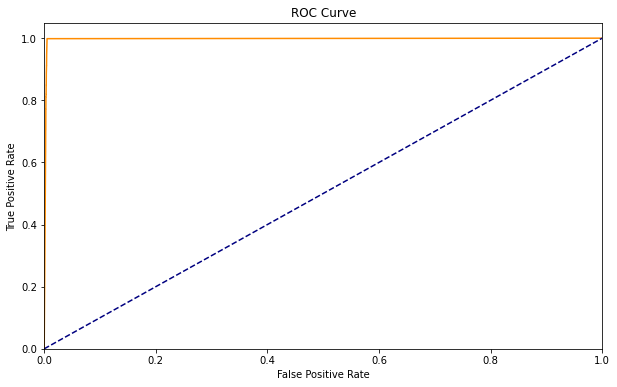

Brier Score:
104.56183335951869


In [9]:
# Train a Random Forest Classifier model and print the model score

rf = RandomForestClassifier(random_state=42, n_estimators=50)

evaluateModel(rf, X_train, X_test, y_train, y_test)


*The RandomForest model performed just slightly better, 104 vs 108 brier score. The F1 scores for both are a perfect, which leads me to believe there could still be overfitting. The ROC Curve for both are basically identical. However I would choose the RandomForest model due to the confusion numbers and the brier score.*